In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

In [60]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [61]:
X_train = tf.pad(X_train, [[0, 0], [2, 2], [2, 2]])
X_test = tf.pad(X_test, [[0, 0], [2, 2], [2, 2]])
X_train.shape

TensorShape([60000, 32, 32])

In [62]:
print ("X_train shape: " + str(X_train.shape))

X_train shape: (60000, 32, 32)


In [63]:
X_train = tf.expand_dims(X_train, axis = 3, name = None)
X_test = tf.expand_dims(X_test, axis = 3, name = None)
X_train.shape

TensorShape([60000, 32, 32, 1])

In [64]:
Y_train.shape

(60000,)

In [65]:
X_dev = X_train[-2000:, :, :, :]
X_train = X_train[:-2000, :, :, :]
Y_dev = Y_train[-2000:]
Y_train = Y_train[:-2000]

In [66]:
print("X_dev shape: " + str(X_dev.shape))
print("X_train shape: " + str(X_train.shape))
print("Y_dev shape: " + str(Y_dev.shape))
print("Y_train shape: " + str(Y_train.shape))

X_dev shape: (2000, 32, 32, 1)
X_train shape: (58000, 32, 32, 1)
Y_dev shape: (2000,)
Y_train shape: (58000,)


In [70]:
def mnist():
  model = tf.keras.Sequential([
     layers.Conv2D(6, (5, 5), strides = (1, 1), activation="tanh", input_shape = X_train.shape[1:]),
     layers.AveragePooling2D((2, 2)),
     layers.Activation('sigmoid'),
     layers.Conv2D(16, (5, 5), activation='tanh'),
     layers.AveragePooling2D(2),
     layers.Activation('sigmoid'),
     layers.Conv2D(120, 5, activation='tanh'),
     layers.Flatten(),
     layers.Dense(84, activation='tanh'),
     layers.Dense(10, activation='softmax')
  ])
  return model

In [72]:
mnist_model = mnist()
mnist_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
mnist_model.compile(optimizer='adam', loss = losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = mnist_model.fit(X_train, Y_train, batch_size = 64, epochs=40, validation_data= (X_dev, Y_dev))

Epoch 1/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.4838 - loss: 1.4348 - val_accuracy: 0.9440 - val_loss: 0.2154
Epoch 2/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9093 - loss: 0.2797 - val_accuracy: 0.9565 - val_loss: 0.1497
Epoch 3/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9356 - loss: 0.2015 - val_accuracy: 0.9725 - val_loss: 0.1149
Epoch 4/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9473 - loss: 0.1681 - val_accuracy: 0.9760 - val_loss: 0.0993
Epoch 5/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9546 - loss: 0.1415 - val_accuracy: 0.9745 - val_loss: 0.1008
Epoch 6/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9569 - loss: 0.1334 - val_accuracy: 0.9805 - val_loss: 0.0717
Epoch 7/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9627 - loss: 0.1170 - val_accuracy: 0.9825 - val_loss: 0.0724
Epoch 8/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9652 - loss: 0.1089 - 

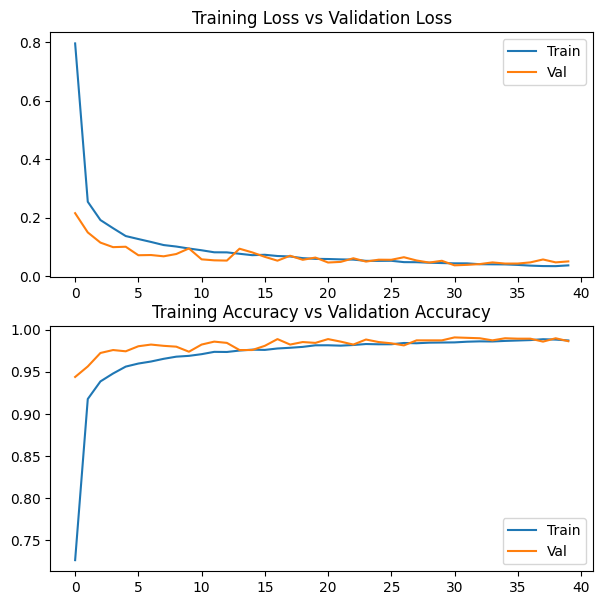

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(7, 7))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [77]:
mnist_model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0596


[0.055104486644268036, 0.9833999872207642]

In [80]:
def test_image(index):
    image = X_test[index]
    true_label = Y_test[index]

    image_input = tf.expand_dims(image, axis=0)  # shape = (1, 32, 32, 1)

    prediction = mnist_model.predict(image_input)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


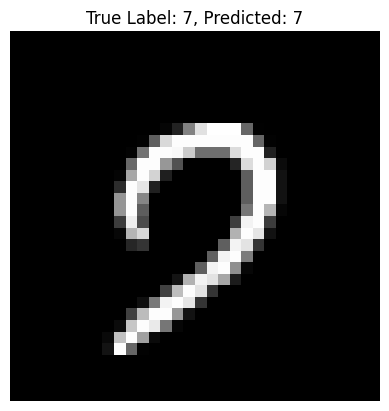

In [110]:
test_image(846)